**1. Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score


import pandas as pd
from sklearn.model_selection import train_test_split

import pickle

df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

**Displaying the dataset**

In [2]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [3]:
# Create a copy of the original dataframe
df_processed = df.copy()

# mapping strings to numeric values:
def numerical_data(df):
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    return df
    
    # reorder dataframe columns :
    # col = df['passed']
    # del df['passed']
    # df['passed'] = col

# Apply numerical mapping
df_processed = numerical_data(df_processed)

# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df.columns:
        if i == 'passed':  # Skip target
            continue
        col = df[i]

        if np.issubdtype(col.dtype, np.number):  # only numeric
            if np.max(col) > 6:
                Max = np.max(col)
                mean = np.mean(col)
                df[i] = (col - mean) / Max
            else:
                Min = np.min(col)
                Max = np.max(col)
                df[i] = (col - Min) / (Max - Min)
    return df



# Apply feature scaling"
df_processed = feature_scaling(df_processed)

# Display processed data
print("Processed Dataset Shape:", df_processed.shape)
df_processed.head()


Processed Dataset Shape: (395, 31)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.0,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.003882,0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.0,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.5,-0.022785,0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.0,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.057215,1
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.5,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.0,-0.049451,1
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.0,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.0,-0.022785,1


**digitization of values**

In [4]:
# All values in numerical after calling numerical_data() function
df_processed = numerical_data(df.copy())


**Features scalling**

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [6]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

# Logistic regression  <h5 style='color:red;font-family:cursive;font-size:4.5mm'> 

# 1-Logistic Regression implementation

**Prepare Data for Linear Regression**

In [7]:
# Separate features and target
X = df_processed.drop('passed', axis=1)
y = df_processed['passed']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (316, 30)
Testing set shape: (79, 30)


**Train Linear Regression Model** 

C:\Users\emma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression Performance
Mean Squared Error: {mse:.4f}
R-squared Score: {r2:.4f}


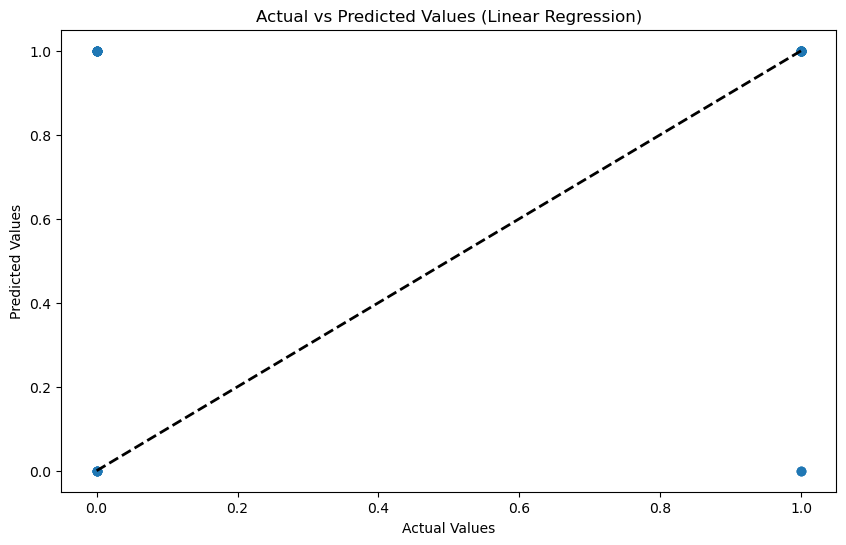

In [9]:
# Initialize and train the linear regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions,
y_pred = lr_model.predict(X_test)

# Evaluate the model\n",
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("Mean Squared Error: {mse:.4f}")
print("R-squared Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

**Feature Importance Analysis**

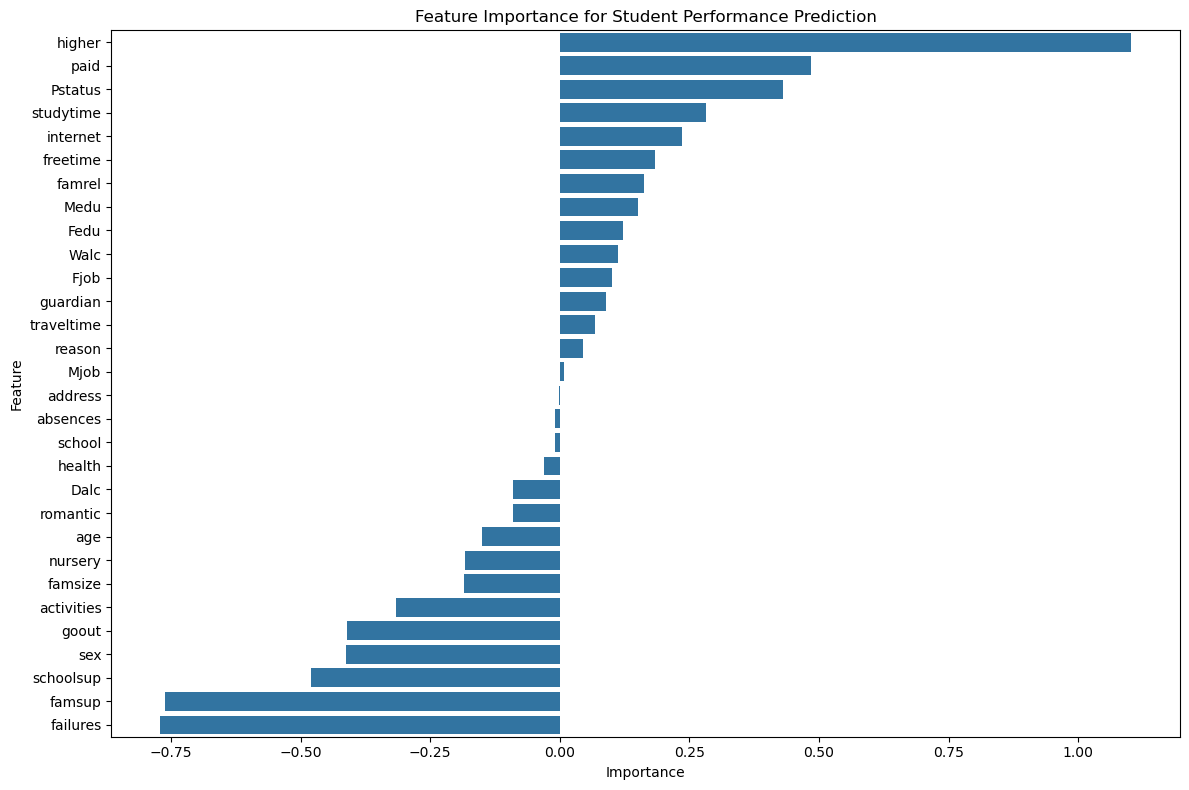

Top 10 Most Important Features
      Feature  Importance
20     higher    1.102583
17       paid    0.484432
5     Pstatus    0.430789
13  studytime    0.281921
21   internet    0.235993
24   freetime    0.183292
23     famrel    0.162706
6        Medu    0.150382
7        Fedu    0.121915
27       Walc    0.111481


In [10]:
 # Get feature importance (coefficients)",
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lr_model.coef_[0]
    }).sort_values('Importance', ascending=False)
    
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Student Performance Prediction')
plt.tight_layout()
plt.show()

# Display top 10 most important features,
print("Top 10 Most Important Features")
print(feature_importance.head(10))

**Save the Model**

In [11]:
# Save the trained model to a file
with open('student_performance_lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved successfully as 'student_performance_lr_model.pkl")

Model saved successfully as 'student_performance_lr_model.pkl


**Load and Use the Model**

In [12]:
# Load the saved model
with open('student_performance_lr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

# Create sample data for prediction
sample_data = X_test.iloc[:5].copy()

# Make predictions using the loaded model
sample_predictions = loaded_model.predict(sample_data)

# Display predictions
print("Sample predictions:")
for i, (idx, row) in enumerate(sample_data.iterrows()):
    print(f"Student {i+1}: predicted Performance = {sample_predictions[i]:.4f}")

# Compare with actual values
print("Actual Value:")
for i, (idx, row) in enumerate(sample_data.iterrows()):
    print(f"Student {i+1}: Actual Performance = {y_test.iloc[i]:.4f}")

Model loaded successfully!
Sample predictions:
Student 1: predicted Performance = 0.0000
Student 2: predicted Performance = 0.0000
Student 3: predicted Performance = 1.0000
Student 4: predicted Performance = 1.0000
Student 5: predicted Performance = 0.0000
Actual Value:
Student 1: Actual Performance = 1.0000
Student 2: Actual Performance = 1.0000
Student 3: Actual Performance = 0.0000
Student 4: Actual Performance = 1.0000
Student 5: Actual Performance = 0.0000


In [13]:
# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Model Coefficients (Ordered by Absolute Value):")
print(coefficients.head(10))

# Interpretation
print("Key Insights:")
print("1. Features with positive coefficients contribute positively to student performance.")
print("2. Features with negative coefficients contribute negatively to student performance.")
print("3. The magnitude of the coefficient indicates the strength of the relationship.")

# Display the most influential features
top_features = coefficients.head(5)
print("Top 5 Most Influential Features:")
for _, row in top_features.iterrows():
    effect = "positive" if row['Coefficient'] > 0 else "negative" 
    print(f"{row['Feature']}: {effect} effect on performance")
    

Model Coefficients (Ordered by Absolute Value):
       Feature  Coefficient
20      higher     1.102583
14    failures    -0.771986
16      famsup    -0.761876
17        paid     0.484432
15   schoolsup    -0.480667
5      Pstatus     0.430789
1          sex    -0.412107
25       goout    -0.409762
18  activities    -0.316815
13   studytime     0.281921
Key Insights:
1. Features with positive coefficients contribute positively to student performance.
2. Features with negative coefficients contribute negatively to student performance.
3. The magnitude of the coefficient indicates the strength of the relationship.
Top 5 Most Influential Features:
higher: positive effect on performance
failures: negative effect on performance
famsup: negative effect on performance
paid: positive effect on performance
schoolsup: negative effect on performance


In [ ]:
# ... [previous code remains the same until after model training] ...

# Save the trained model
with open('student_performance_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Calculate and save scaling parameters from training data
scaling_params = {}
for feature in X_train.columns:
    col = X_train[feature]
    if np.max(col) > 6:
        scaling_params[feature] = {'type': 'mean_max', 'mean': np.mean(col), 'max': np.max(col)}
    else:
        scaling_params[feature] = {'type': 'minmax', 'min': np.min(col), 'max': np.max(col)}

# Save scaling parameters
with open('scaling_params.pkl', 'wb') as f:
    pickle.dump(scaling_params, f)

# Function to scale a single data point using precomputed parameters
def scale_single_data_point(data_point, scaling_params):
    scaled_data = {}
    for feature, value in data_point.items():
        if feature in scaling_params:
            params = scaling_params[feature]
            if params['type'] == 'mean_max':
                scaled_data[feature] = (value - params['mean']) / params['max']
            else:
                Min = params['min']
                Max = params['max']
                scaled_data[feature] = (value - Min) / (Max - Min)
        else:
            scaled_data[feature] = value
    return scaled_data

# Function to get user input and make prediction
def predict_student_performance():
    # Load the trained model
    with open('student_performance_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Load scaling parameters
    with open('scaling_params.pkl', 'rb') as f:
        scaling_params = pickle.load(f)
    
    # Define feature names
    features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
               'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
               'Walc', 'health', 'absences']
    
    # Get user input for each feature
    user_input = {}
    print("Please provide the following student information:")
    
    for feature in features:
        if feature in ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'higher', 'internet', 'romantic']:
            # Categorical features
            if feature == 'school':
                options = {'GP': 0, 'MS': 1}
                prompt = "School (GP or MS): "
            elif feature == 'sex':
                options = {'M': 0, 'F': 1}
                prompt = "Sex (M or F): "
            elif feature == 'address':
                options = {'U': 0, 'R': 1}
                prompt = "Address (U for Urban or R for Rural): "
            elif feature == 'famsize':
                options = {'LE3': 0, 'GT3': 1}
                prompt = "Family size (LE3 for <=3 or GT3 for >3): "
            elif feature == 'Pstatus':
                options = {'T': 0, 'A': 1}
                prompt = "Parent's cohabitation status (T for Together or A for Apart): "
            elif feature in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
                options = {'no': 0, 'yes': 1}
                prompt = f"{feature} (yes or no): "
            
            while True:
                value = input(prompt).strip()
                if value in options:
                    user_input[feature] = options[value]
                    break
                else:
                    print(f"Invalid input. Please enter one of: {list(options.keys())}")
        
        elif feature in ['Mjob', 'Fjob']:
            options = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
            prompt = f"{feature} (teacher, health, services, at_home, other): "
            
            while True:
                value = input(prompt).strip()
                if value in options:
                    user_input[feature] = options[value]
                    break
                else:
                    print(f"Invalid input. Please enter one of: {list(options.keys())}")
        
        elif feature == 'reason':
            options = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
            prompt = "Reason to choose this school (home, reputation, course, other): "
            
            while True:
                value = input(prompt).strip()
                if value in options:
                    user_input[feature] = options[value]
                    break
                else:
                    print(f"Invalid input. Please enter one of: {list(options.keys())}")
        
        elif feature == 'guardian':
            options = {'mother': 0, 'father': 1, 'other': 2}
            prompt = "Guardian (mother, father, other): "
            
            while True:
                value = input(prompt).strip()
                if value in options:
                    user_input[feature] = options[value]
                    break
                else:
                    print(f"Invalid input. Please enter one of: {list(options.keys())}")
        
        else:
            # Numerical features
            if feature == 'age':
                prompt = "Age (15-22): "
            elif feature in ['Medu', 'Fedu']:
                prompt = f"{feature} (0-4): "
            elif feature in ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']:
                prompt = f"{feature} (1-5): "
            elif feature == 'absences':
                prompt = "Absences (0-93): "
            
            while True:
                try:
                    value = float(input(prompt))
                    user_input[feature] = value
                    break
                except ValueError:
                    print("Please enter a valid number.")
    
    # Scale the user input using precomputed parameters
    scaled_input = scale_single_data_point(user_input, scaling_params)
    
    # Create a DataFrame from the scaled input
    input_df = pd.DataFrame([scaled_input])
    
    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)
    
    # Display result
    result = "PASS" if prediction[0] == 1 else "FAIL"
    confidence = prediction_proba[0][1] if prediction[0] == 1 else prediction_proba[0][0]
    
    print(f"\nPrediction: The student is likely to {result}")
    print(f"Confidence: {confidence:.2%}")

# Call the function to get user input and make prediction
predict_student_performance()

Please provide the following student information:
